In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 10,6
import seaborn as sns
import numpy as np

from collections import defaultdict
np.random.seed(42)

import math
from scipy.stats import multivariate_normal as mv


In [2]:

def generate_data(var= 15, k=10, size = 1000):
    mu_actual = np.random.normal(loc=0, scale=var, size= k)
    data = np.empty(size)
    actual_mu = np.empty(size)
    data_plt = defaultdict(list)
    for _ in range(size):
        col = np.random.choice(k)
        tmp_mu = mu_actual[col]
        data[_] = np.random.normal(loc=tmp_mu, scale=1, size= 1)
        actual_mu[_] = tmp_mu
        data_plt[col].append(data[_])
    return data, actual_mu, data_plt
    

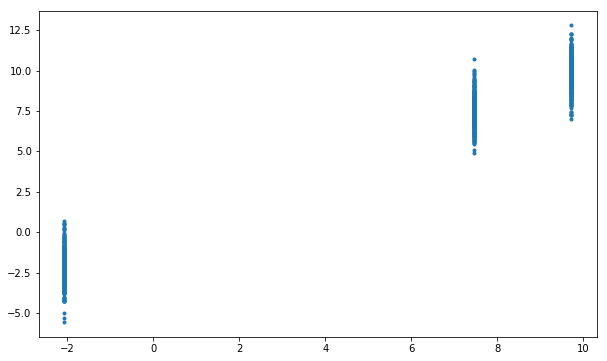

In [3]:
K=3
dat, mu, data_p = generate_data(k=K)

plt.plot(mu, dat, ".")
plt.show()

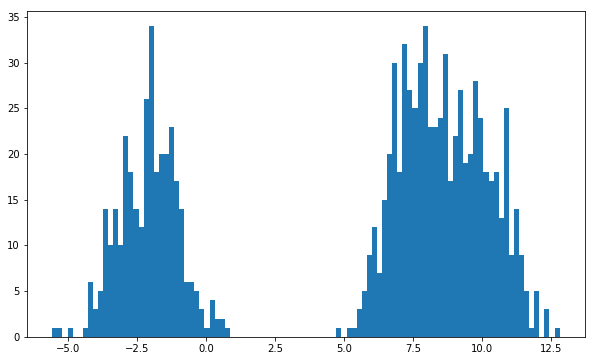

In [4]:
plt.hist(dat,bins=100)
plt.show()

In [5]:
def compute_elbo(var_mu, var_var, var_cat_point):
    pass

def cavi(data, prior_var=1, k=10,size=1000):
    ## initialize params
    cat_point = np.zeros((size,k))
    for _ in range(size):
        cat_point[_, np.random.choice(k)] = 1
    

    mu_new = np.random.normal(loc=0, scale=10, size= k)
    var_new = np.random.rand(k)*k

    while True:
        mu_old = mu_new[:]
        var_old = var_new[:]
        for i in range(size):
            cat_point[i]  = np.exp(mu_old*data[i] - (var_old+mu_old**2)/2)
            cat_point[i] = cat_point[i]/np.sum(cat_point[i])
        
        for j in range(k):
            mu_new[j] = np.sum(cat_point[:,j]*data)/((1/prior_var) + np.sum(cat_point[:,j]))
            var_new[j] = 1/((1/prior_var) + np.sum(cat_point[:,j]))
        
        if np.dot(mu_old-mu_new,mu_old-mu_new) < 0.000001:
            break
        
    mixture_components = list(zip(mu_new,var_new))
    mixture_components.sort()
    return mixture_components, cat_point

#         new_elbo = compute_elbo(mu_new, var_new, cat_point)
#         if new_elbo - old_elbo < error:
#             break
#         else:
#             old_elbo = new_elbo

In [28]:
mu_var, cluster_prob = cavi(dat, k = K)
mu_var

[(-1.952708144098749, 0.002936782113915593),
 (6.949726192655015, 0.44904307378988),
 (8.623707092670585, 0.0015145450215546528)]

In [29]:
sorted(set(mu))

[-2.0739645175677697, 7.45071229516849, 9.715328071510388]

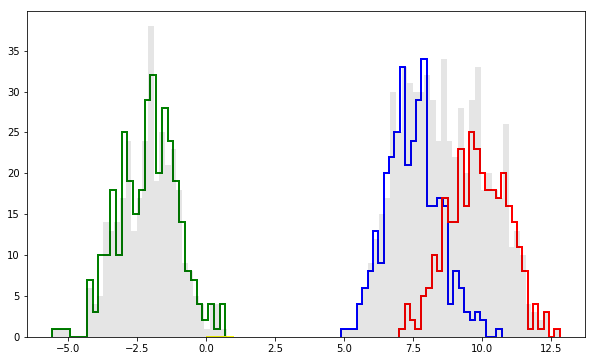

In [30]:
color = ['blue', 'green', 'red', 'magenta', 'yellow']

for k in range(5):
    plt.hist(data_p[k], bins=30, color=color[k], histtype='step', lw=2)
plt.hist(dat, color='k', bins=90, alpha=0.1)
plt.show()

C:\Users\onkar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


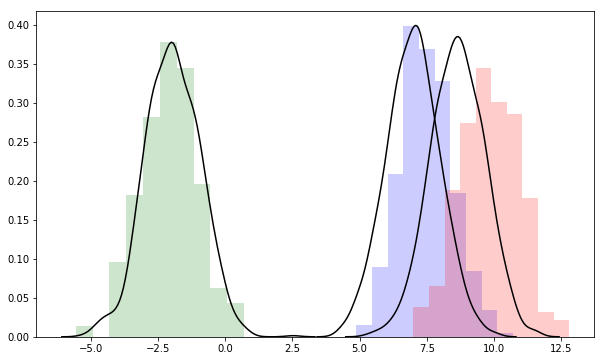

In [31]:
for k in range(K):
    plt.hist(data_p[k], bins=10, color=color[k], alpha=0.2, normed=True)
for k in range(K):
    vals=np.random.normal(mu_var[k][0], 1, size=1000)
    sns.kdeplot(vals,  color='k')
plt.show()

In [32]:
for i in range(K):
    print("Actual number of points, GMM points")
    print(len(data_p[i]), sum(cluster_prob[:,i]>0.5))
    

Actual number of points, GMM points
345 337
Actual number of points, GMM points
334 1
Actual number of points, GMM points
321 662
